# (a)  important default indicators

In [1]:
plt.figure(figsize=(15,5))
plt.plot(columns_names, model.coef_[0,:], 'o')
plt.axhline(y=0,c='r')
plt.title('Coef')
plt.show()

print('The coefficients of features accessed by logistic regression can explain the importance of each feature.')
print('Importance of features:(from the most important to the least)')
print('The feature above Red line affect the delinquent behavior positively')
print('And feature below Red line affect the delinquent behavior negatively')
print('=============================================')
rank = list((-abs(model.coef_[0,:])).argsort())\

NameError: name 'plt' is not defined

# (b) Result in test set

Train:
              precision    recall  f1-score   support

           0     0.8833    0.9972    0.9368    174755
           1     0.4602    0.0180    0.0346     23455

    accuracy                         0.8813    198210
   macro avg     0.6717    0.5076    0.4857    198210
weighted avg     0.8332    0.8813    0.8300    198210

[[174260    495]
 [ 23033    422]]


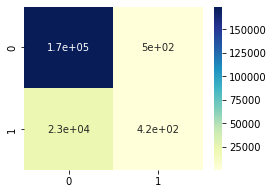

Test:
              precision    recall  f1-score   support

           0     0.8838    0.9974    0.9371     86103
           1     0.5033    0.0199    0.0382     11524

    accuracy                         0.8820     97627
   macro avg     0.6935    0.5086    0.4877     97627
weighted avg     0.8389    0.8820    0.8310     97627

[[85877   226]
 [11295   229]]


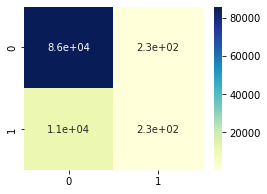

In [240]:
from sklearn import metrics
import seaborn as sns

def myResult(y_train, predict_target, y_test, predict_target2):
    print("Train:")
    print(metrics.classification_report(y_train,predict_target, digits=4))
    cm = metrics.confusion_matrix(y_train,predict_target)
    print(cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu")
    plt.show()

    print("Test:")
    print(metrics.classification_report(y_test,predict_target2, digits=4))
    cm = metrics.confusion_matrix(y_test,predict_target2)
    print(cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu")
    plt.show()    

y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
myResult(y_train, y_train_predict, y_test, y_test_predict)

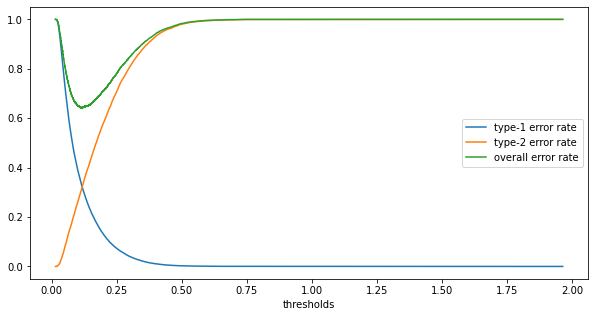

In [241]:
y_test_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
fnr = 1-tpr
overall_error = fpr+fnr
plt.figure(figsize=(10, 5))
plt.plot(thresholds, fpr)
plt.plot(thresholds, fnr)
plt.plot(thresholds, overall_error)
plt.legend(('type-1 error rate','type-2 error rate','overall error rate'))
plt.xlabel('thresholds')
plt.show()